In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Load the dataset
df = pd.read_csv('outcomes.csv')

# Check the number of rows and columns
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])


Number of rows: 3998
Number of columns: 39


In [2]:
# Look at the column names
print('Column names:', list(df.columns))

Column names: ['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10percentage', '10board', '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [4]:
# Look for missing values
print('Missing values:')
print(df.isnull().sum())

Missing values:
Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion

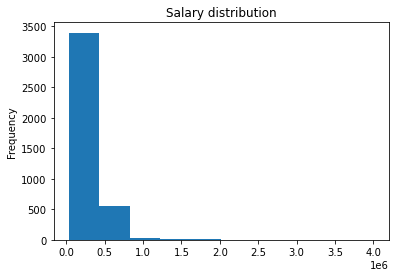

In [5]:
df['Salary'].plot(kind='hist', bins=10, title='Salary distribution')
plt.show()

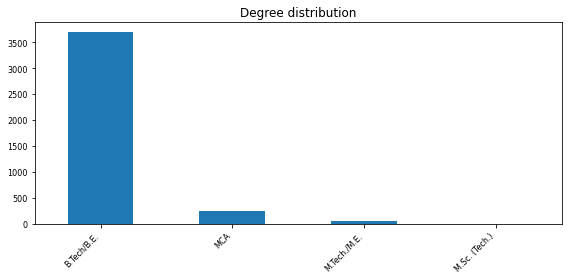

In [6]:
plt.figure(figsize=(8,4))
ax = df['Degree'].value_counts().plot(kind='bar', title='Degree distribution', fontsize=8)
ax.set_xticklabels(df['Degree'].value_counts().index, rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

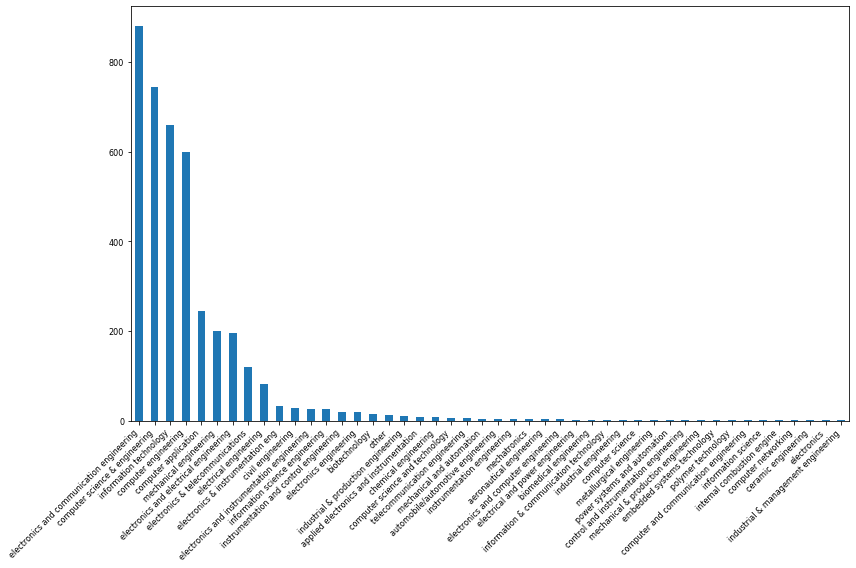

In [7]:
plt.figure(figsize=(12,8))
ax = df['Specialization'].value_counts().plot(kind='bar', fontsize=8)
ax.set_xticklabels(df['Specialization'].value_counts().index, rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

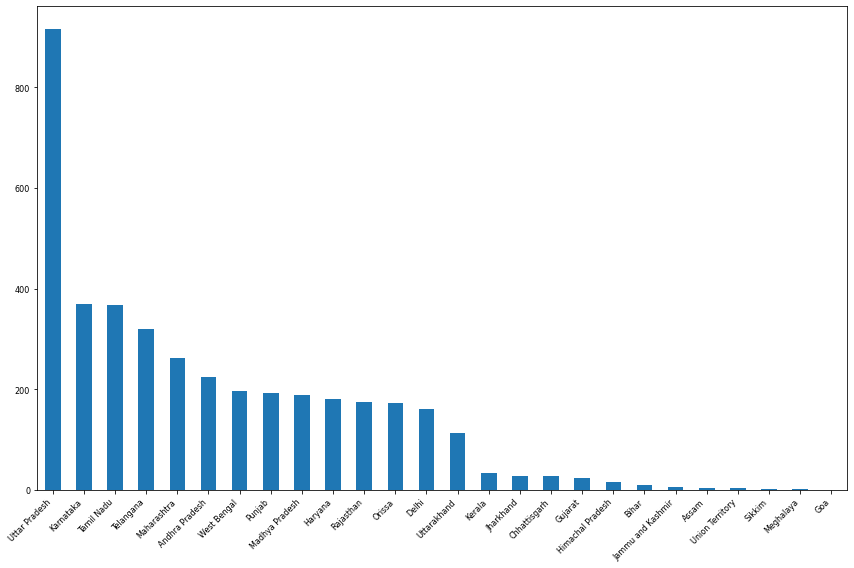

In [8]:
plt.figure(figsize=(12,8))
ax = df['CollegeState'].value_counts().plot(kind='bar', fontsize=8)
ax.set_xticklabels(df['CollegeState'].value_counts().index, rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [9]:
salary_stats = df['Salary'].describe()
gpa_stats = df['collegeGPA'].describe()
tenth_stats=df['10percentage'].describe()
twelve_stats=df['12percentage'].describe()
# Print the summary statistics
print('Summary statistics for Salary:')
print(salary_stats)

Summary statistics for Salary:
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64


In [10]:
print('Summary statistics for GPA:')
print(gpa_stats)

Summary statistics for GPA:
count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64


In [11]:
print('Summary statistics for 10th percentage:')
print(tenth_stats)

Summary statistics for 10th percentage:
count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64


In [12]:
print('Summary statistics for 12th percentage:')
print(twelve_stats)

Summary statistics for 12th percentage:
count    3998.000000
mean       74.466366
std        10.999933
min        40.000000
25%        66.000000
50%        74.400000
75%        82.600000
max        98.700000
Name: 12percentage, dtype: float64


In [13]:
eng_score = df['English'].describe()
logical_score=df['Logical'].describe()
quant_score=df['Quant'].describe()
domain_score=df['Domain'].describe()
print('Summary statistics for English Score:')
print(eng_score)

Summary statistics for English Score:
count    3998.000000
mean      501.649075
std       104.940021
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64


In [14]:
print('Summary statistics for Logical Score:')
print(logical_score)

Summary statistics for Logical Score:
count    3998.000000
mean      501.598799
std        86.783297
min       195.000000
25%       445.000000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64


In [15]:
print('Summary statistics for Quant Score:')
print(quant_score)

Summary statistics for Quant Score:
count    3998.000000
mean      513.378189
std       122.302332
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64


In [16]:
print('Summary statistics for Domain Score:')
print(domain_score)

Summary statistics for Domain Score:
count    3998.000000
mean        0.510490
std         0.468671
min        -1.000000
25%         0.342315
50%         0.622643
75%         0.842248
max         0.999910
Name: Domain, dtype: float64


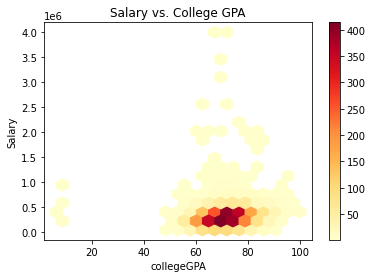

In [17]:
plt.hexbin(df['collegeGPA'], df['Salary'], gridsize=20, cmap='YlOrRd', mincnt=1)
plt.xlabel('collegeGPA')
plt.ylabel('Salary')
plt.colorbar()
plt.title('Salary vs. College GPA')
plt.show()

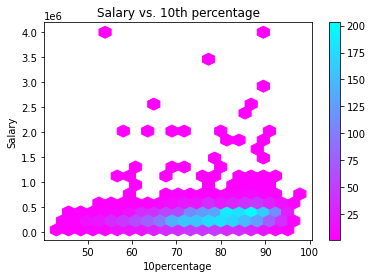

In [18]:
plt.hexbin(df['10percentage'], df['Salary'], gridsize=20, cmap='cool_r', mincnt=1)
plt.xlabel('10percentage')
plt.ylabel('Salary')
plt.colorbar()
plt.title('Salary vs. 10th percentage')
plt.show()

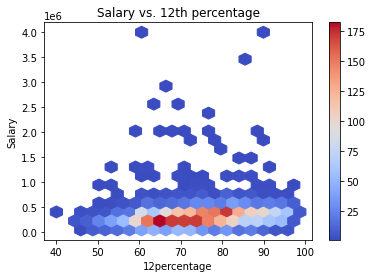

In [19]:
plt.hexbin(df['12percentage'], df['Salary'], gridsize=20, cmap='coolwarm', mincnt=1)
plt.xlabel('12percentage')
plt.ylabel('Salary')
plt.colorbar()
plt.title('Salary vs. 12th percentage')
plt.show()

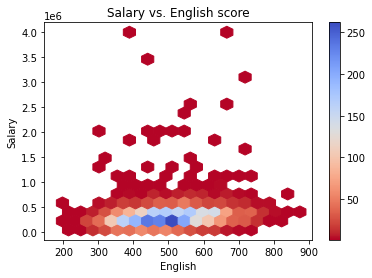

In [20]:
plt.hexbin(df['English'], df['Salary'], gridsize=20, cmap='coolwarm_r', mincnt=1)
plt.xlabel('English')
plt.ylabel('Salary')
plt.colorbar()
plt.title('Salary vs. English score')
plt.show()

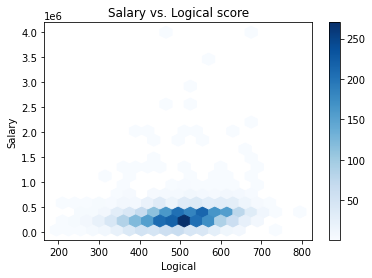

In [21]:
plt.hexbin(df['Logical'], df['Salary'], gridsize=20, cmap='Blues', mincnt=1)
plt.xlabel('Logical')
plt.ylabel('Salary')
plt.colorbar()
plt.title('Salary vs. Logical score')
plt.show()

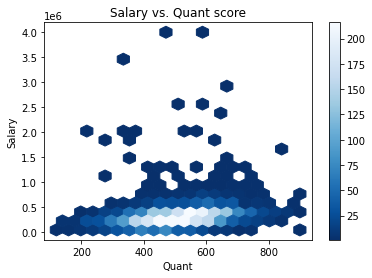

In [22]:
plt.hexbin(df['Quant'], df['Salary'], gridsize=20, cmap='Blues_r', mincnt=1)
plt.xlabel('Quant')
plt.ylabel('Salary')
plt.colorbar()
plt.title('Salary vs. Quant score')
plt.show()

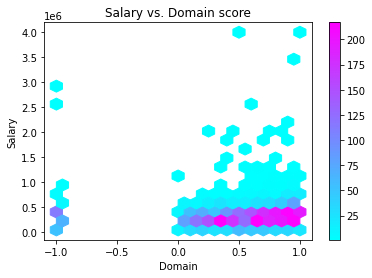

In [23]:
plt.hexbin(df['Domain'], df['Salary'], gridsize=20, cmap='cool', mincnt=1)
plt.xlabel('Domain')
plt.ylabel('Salary')
plt.colorbar()
plt.title('Salary vs. Domain score')
plt.show()

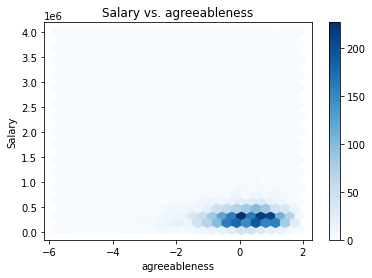

In [24]:
plt.hexbin(df['agreeableness'], df['Salary'], gridsize=25, cmap='Blues')
plt.xlabel('agreeableness')
plt.ylabel('Salary')
plt.title('Salary vs. agreeableness')
plt.colorbar()
plt.show()

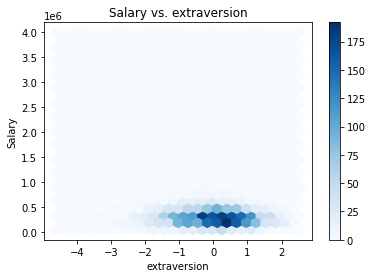

In [25]:
plt.hexbin(df['extraversion'], df['Salary'], gridsize=25, cmap='Blues')
plt.xlabel('extraversion')
plt.ylabel('Salary')
plt.title('Salary vs. extraversion')
plt.colorbar()
plt.show()

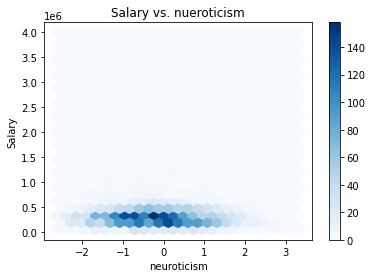

In [26]:
plt.hexbin(df['nueroticism'], df['Salary'], gridsize=25, cmap='Blues')
plt.xlabel('neuroticism')
plt.ylabel('Salary')
plt.title('Salary vs. nueroticism')
plt.colorbar()
plt.show()

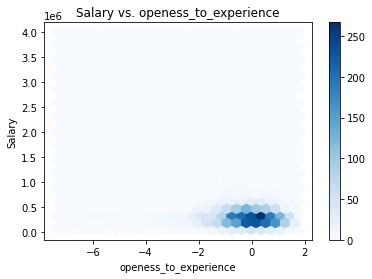

In [27]:
plt.hexbin(df['openess_to_experience'], df['Salary'], gridsize=25, cmap='Blues')
plt.xlabel('openess_to_experience')
plt.ylabel('Salary')
plt.title('Salary vs. openess_to_experience')
plt.colorbar()
plt.show()

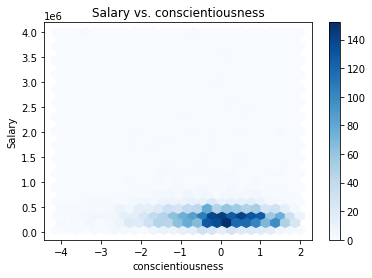

In [28]:
plt.hexbin(df['conscientiousness'], df['Salary'], gridsize=25, cmap='Blues')
plt.xlabel('conscientiousness')
plt.ylabel('Salary')
plt.title('Salary vs. conscientiousness')
plt.colorbar()
plt.show()

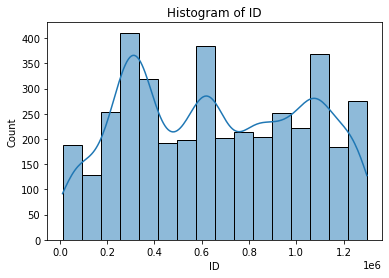

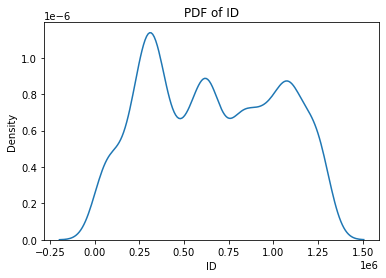

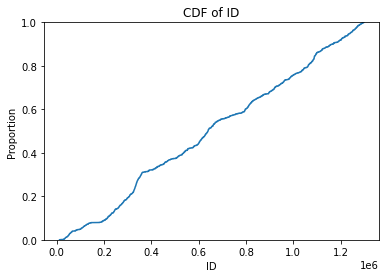

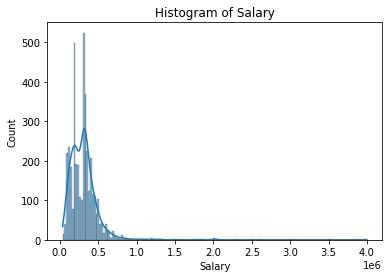

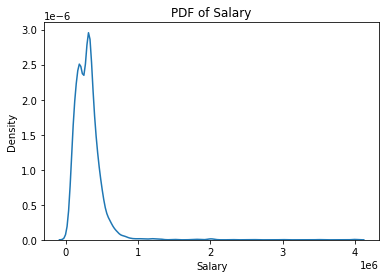

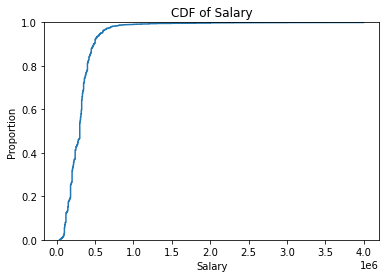

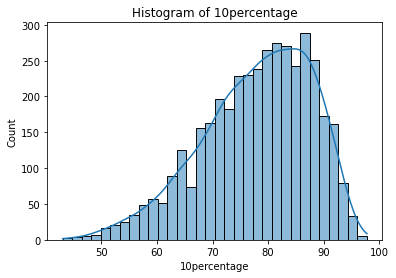

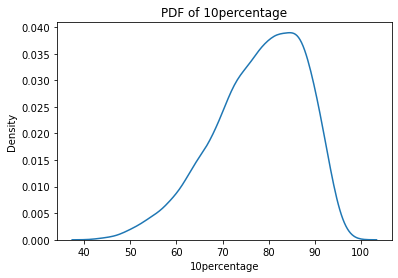

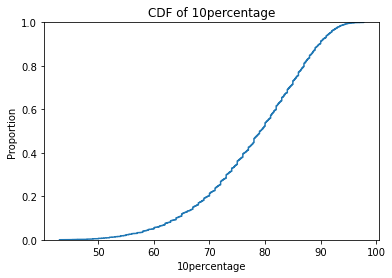

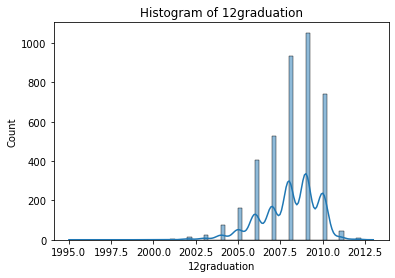

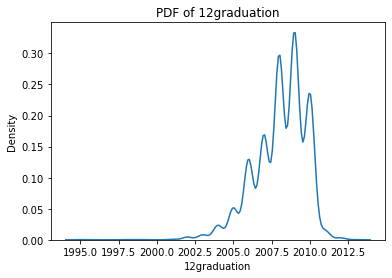

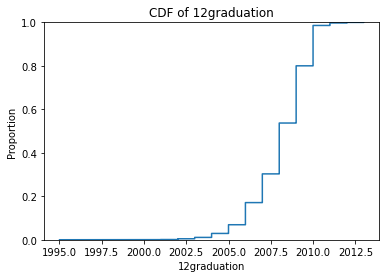

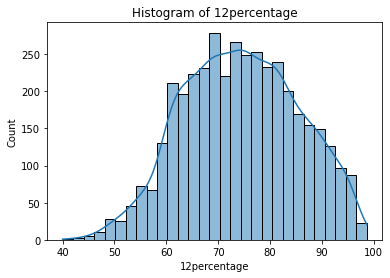

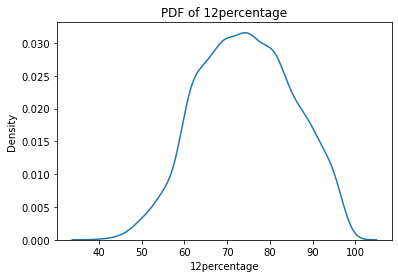

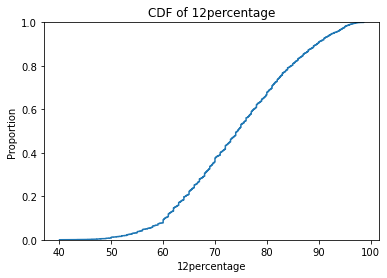

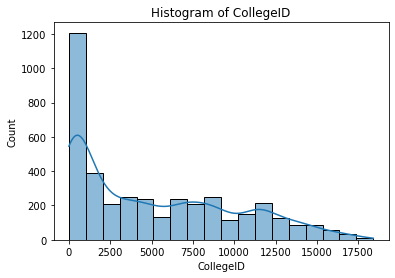

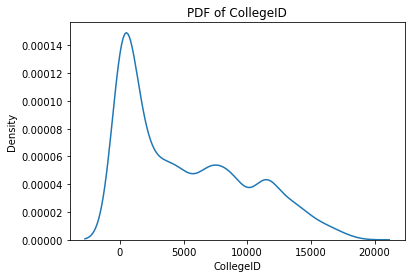

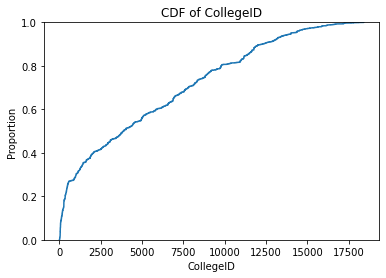

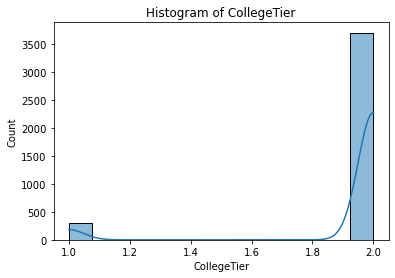

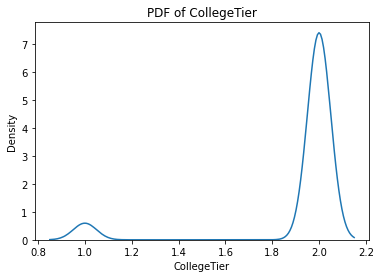

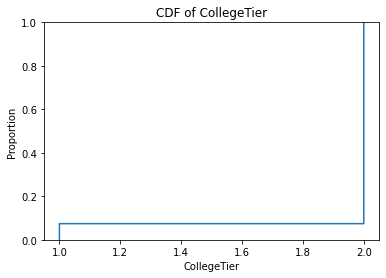

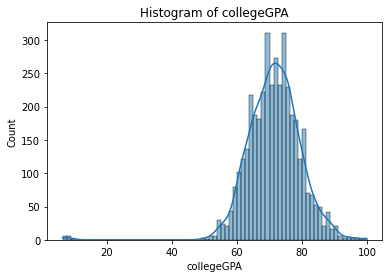

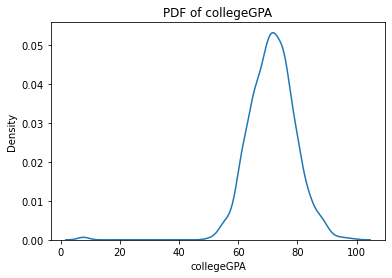

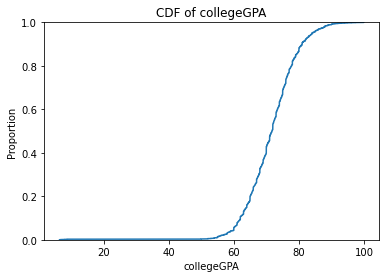

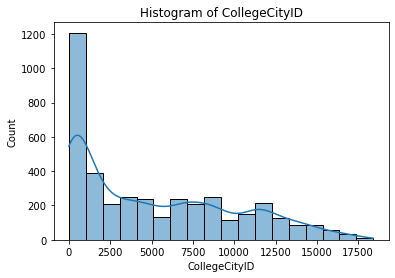

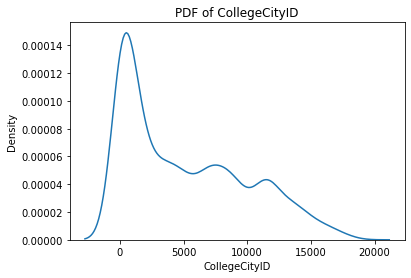

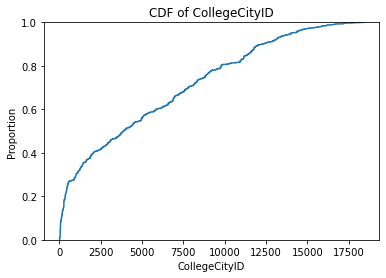

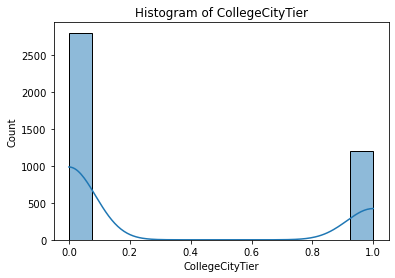

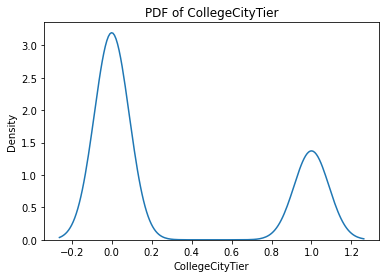

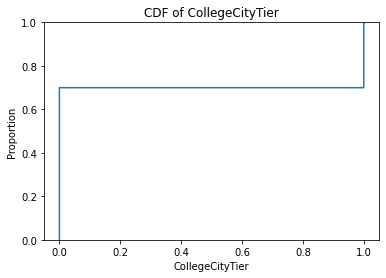

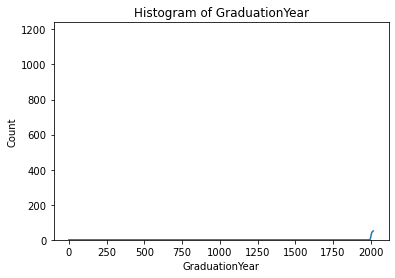

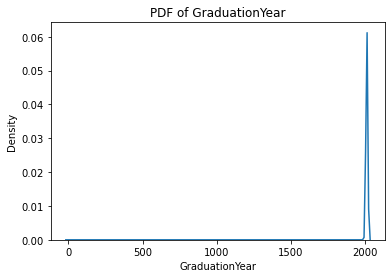

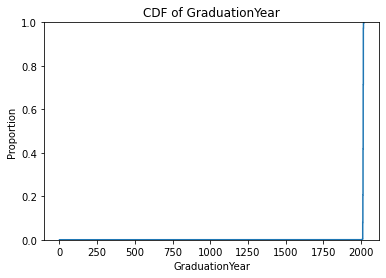

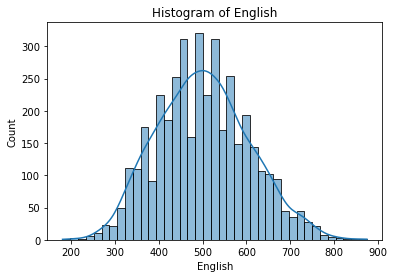

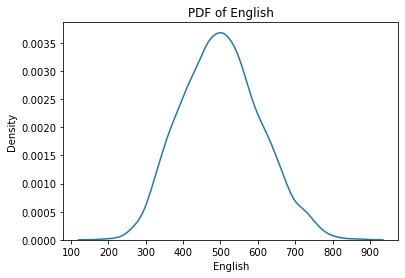

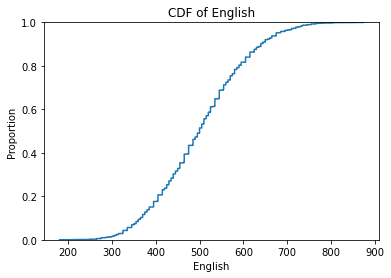

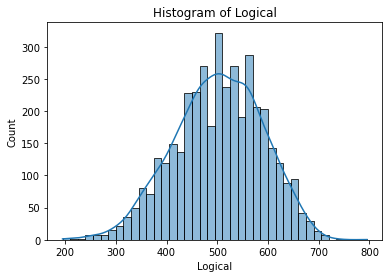

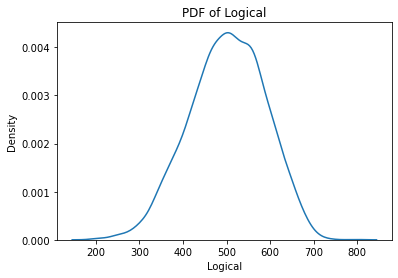

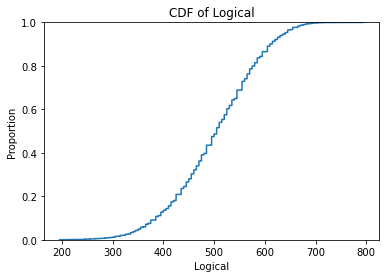

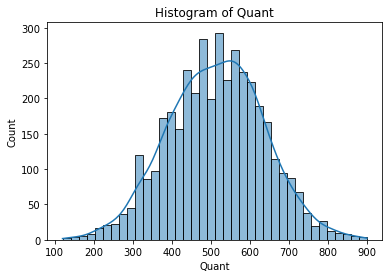

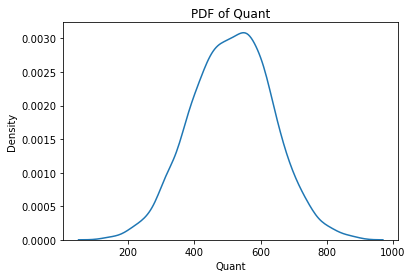

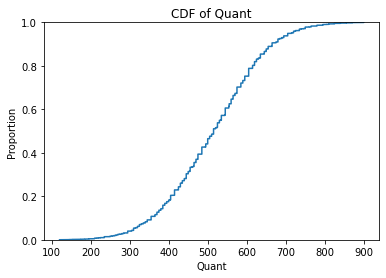

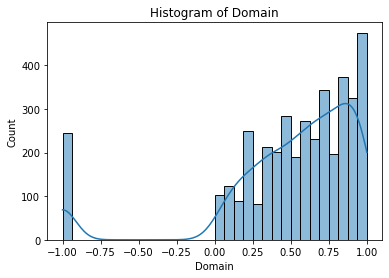

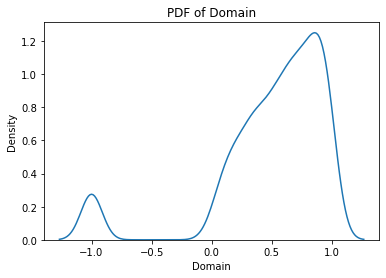

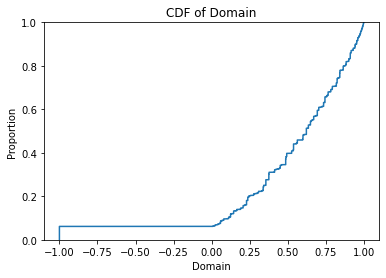

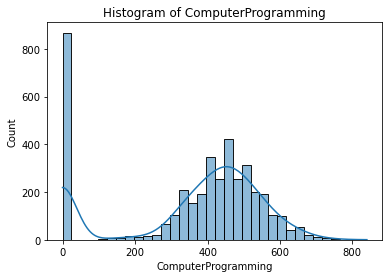

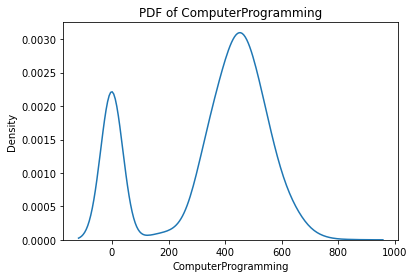

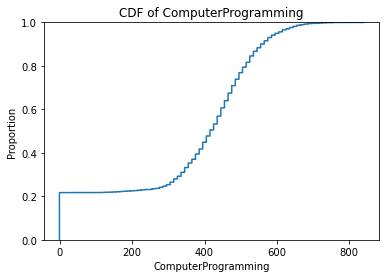

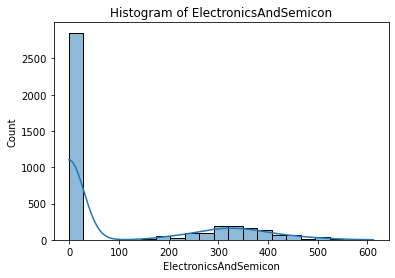

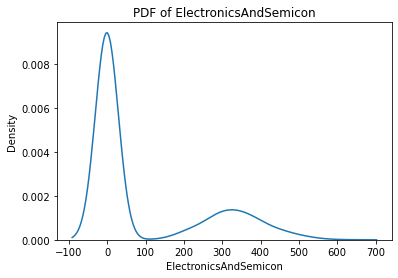

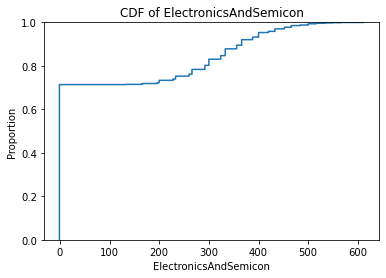

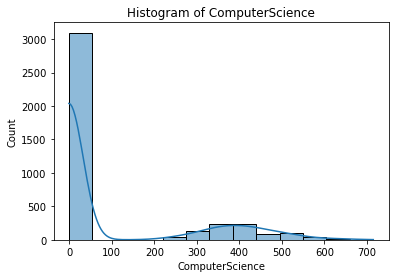

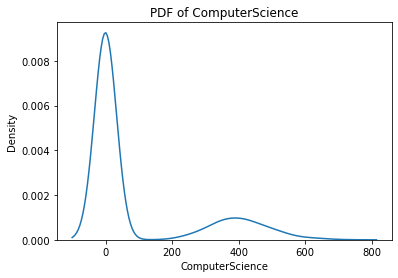

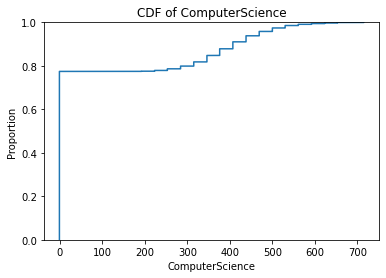

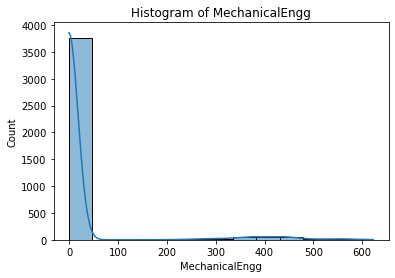

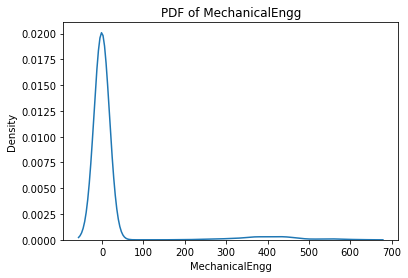

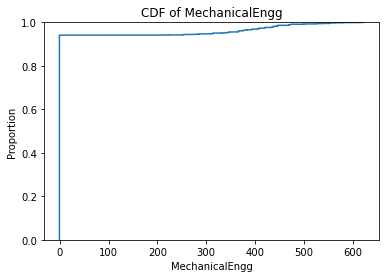

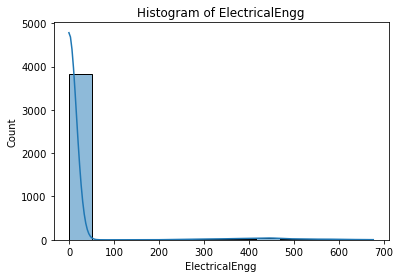

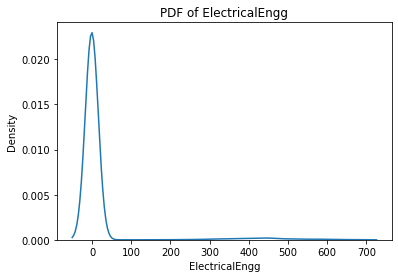

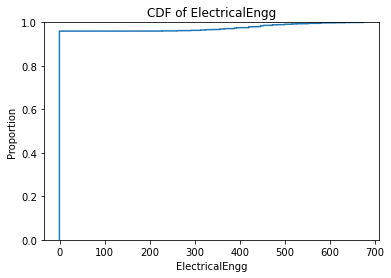

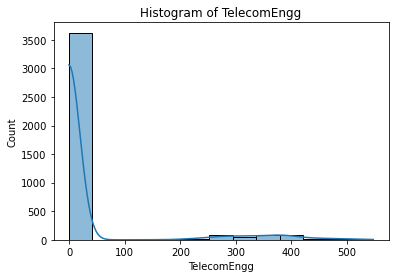

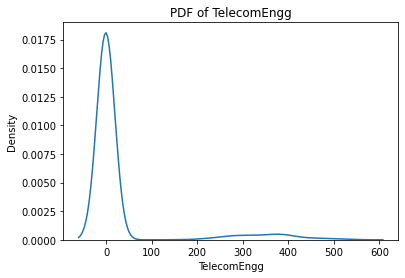

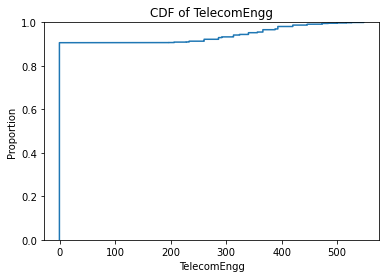

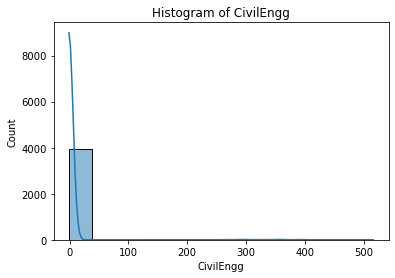

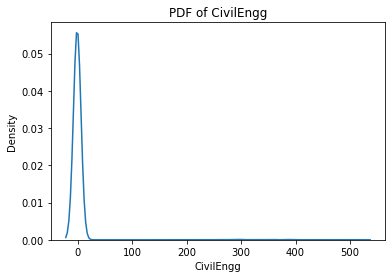

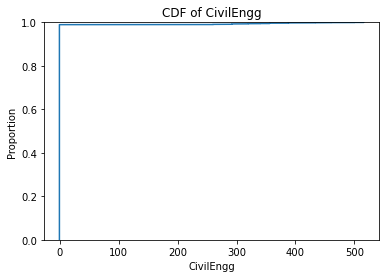

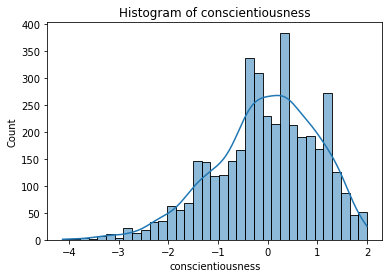

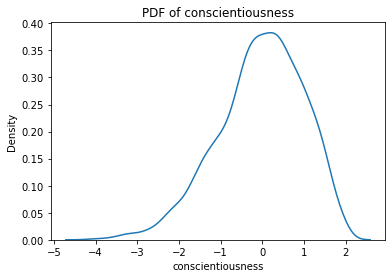

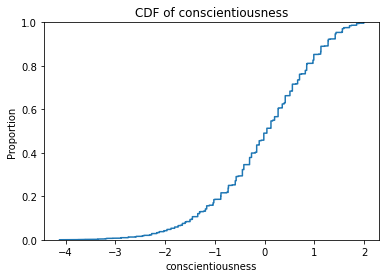

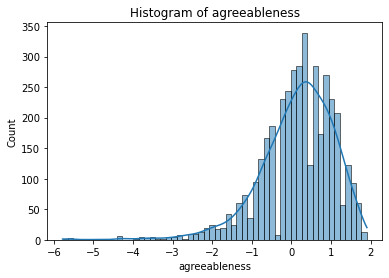

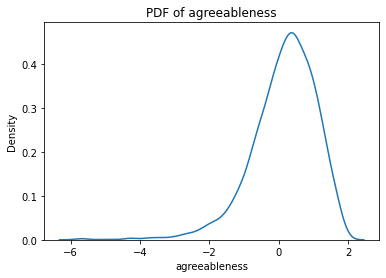

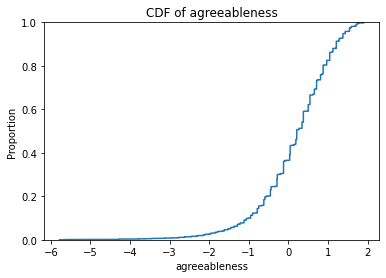

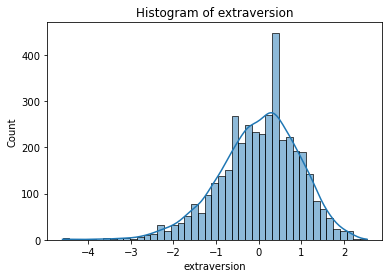

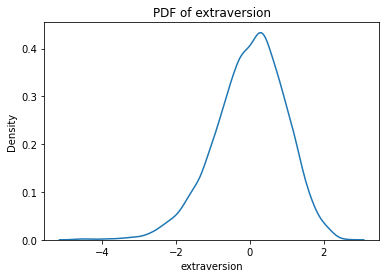

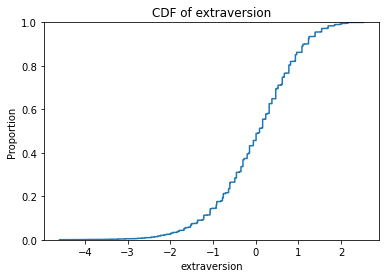

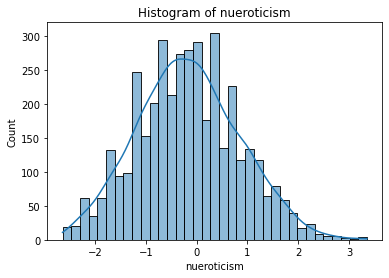

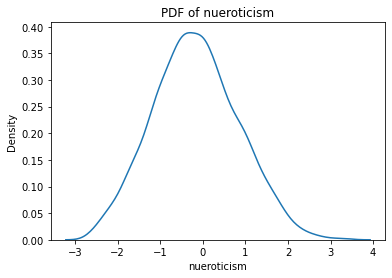

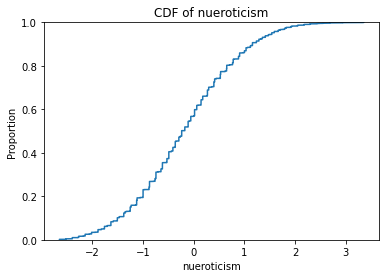

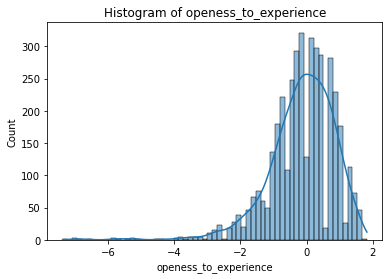

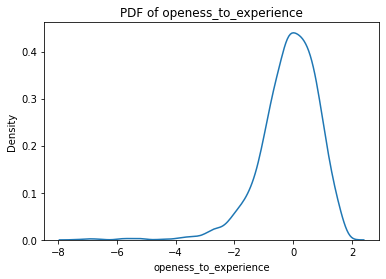

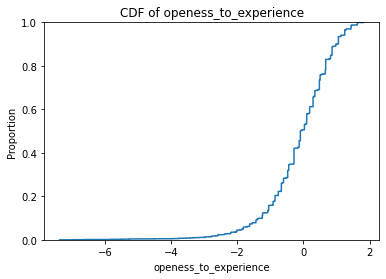

In [29]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Loop through numerical columns
for col in numerical_cols:
    # Plot histogram
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()
    
    # Plot probability density function (PDF)
    plt.figure()
    sns.kdeplot(df[col])
    plt.title(f"PDF of {col}")
    plt.show()
    
    # Plot cumulative distribution function (CDF)
    plt.figure()
    sns.ecdfplot(df[col])
    plt.title(f"CDF of {col}")
    plt.show()

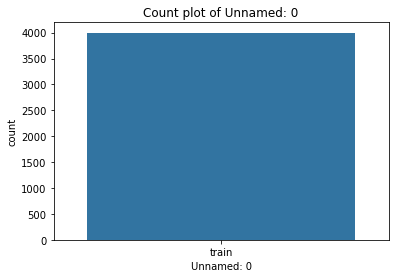


Frequency Distribution Table of Unnamed: 0:
       Frequency
train        1.0


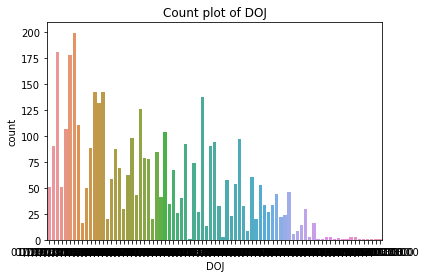


Frequency Distribution Table of DOJ:
                Frequency
01/07/14 00:00   0.049775
01/06/14 00:00   0.045023
01/08/14 00:00   0.044522
01/09/14 00:00   0.035518
01/01/14 00:00   0.035518
...                   ...
01/11/15 00:00   0.000250
01/11/09 00:00   0.000250
01/08/04 00:00   0.000250
01/09/09 00:00   0.000250
01/02/07 00:00   0.000250

[81 rows x 1 columns]


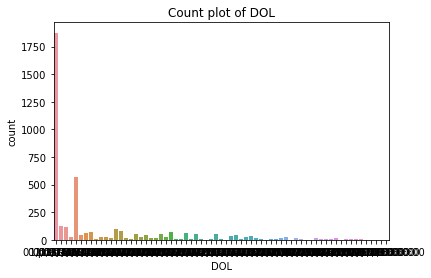


Frequency Distribution Table of DOL:
                Frequency
present          0.468984
01/04/15 00:00   0.143322
01/03/15 00:00   0.031016
01/05/15 00:00   0.028014
01/01/15 00:00   0.024762
...                   ...
01/03/05 00:00   0.000250
01/10/15 00:00   0.000250
01/02/10 00:00   0.000250
01/02/11 00:00   0.000250
01/10/10 00:00   0.000250

[67 rows x 1 columns]


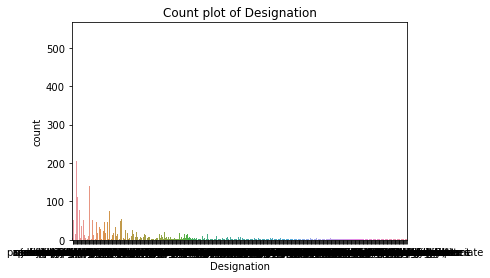


Frequency Distribution Table of Designation:
                                   Frequency
software engineer                   0.134817
software developer                  0.066283
system engineer                     0.051276
programmer analyst                  0.034767
systems engineer                    0.029515
...                                      ...
cad drafter                         0.000250
noc engineer                        0.000250
human resources intern              0.000250
senior quality assurance engineer   0.000250
jr. software developer              0.000250

[419 rows x 1 columns]


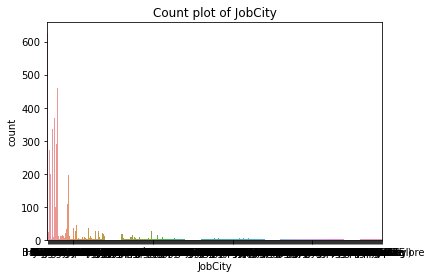


Frequency Distribution Table of JobCity:
                  Frequency
Bangalore          0.156828
-1                 0.115308
Noida              0.092046
Hyderabad          0.083792
Pune               0.072536
...                     ...
Tirunelvelli       0.000250
Ernakulam          0.000250
Nanded             0.000250
Dharmapuri         0.000250
Asifabadbanglore   0.000250

[339 rows x 1 columns]


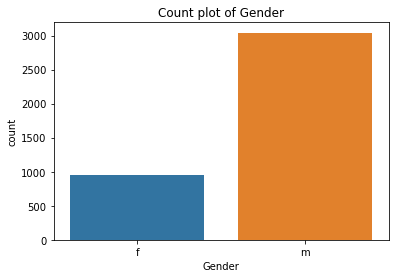


Frequency Distribution Table of Gender:
   Frequency
m    0.76063
f    0.23937


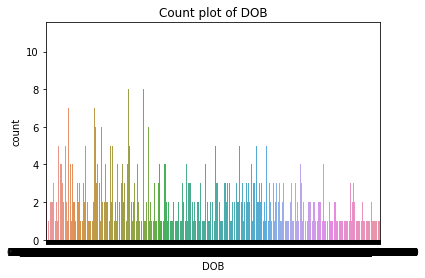


Frequency Distribution Table of DOB:
                Frequency
01/01/91 00:00   0.002751
15/07/91 00:00   0.002501
05/07/91 00:00   0.002001
13/12/91 00:00   0.002001
03/06/91 00:00   0.002001
...                   ...
30/12/92 00:00   0.000250
20/10/86 00:00   0.000250
17/11/89 00:00   0.000250
30/09/92 00:00   0.000250
15/04/87 00:00   0.000250

[1872 rows x 1 columns]


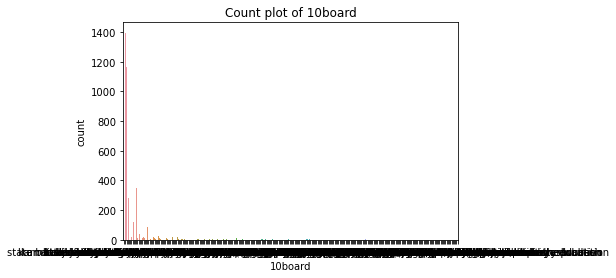


Frequency Distribution Table of 10board:
                            Frequency
cbse                         0.348924
state board                  0.291146
0                            0.087544
icse                         0.070285
ssc                          0.030515
...                               ...
hse,orissa                   0.000250
national public school       0.000250
nagpur board                 0.000250
jharkhand academic council   0.000250
bse,odisha                   0.000250

[275 rows x 1 columns]


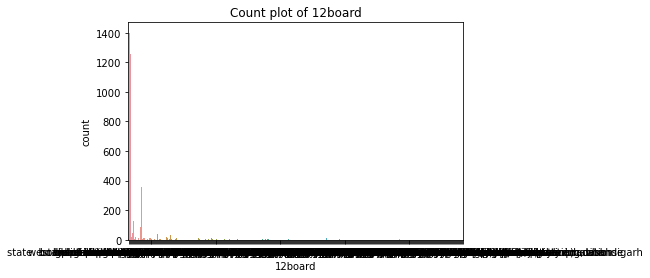


Frequency Distribution Table of 12board:
                                  Frequency
cbse                               0.350175
state board                        0.313657
0                                  0.089795
icse                               0.032266
up board                           0.021761
...                                     ...
jawahar higher secondary school    0.000250
nagpur board                       0.000250
bsemp                              0.000250
board of higher secondary orissa   0.000250
boardofintermediate                0.000250

[340 rows x 1 columns]


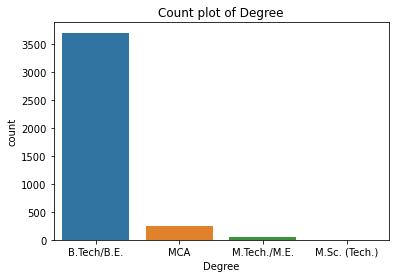


Frequency Distribution Table of Degree:
               Frequency
B.Tech/B.E.     0.925463
MCA             0.060780
M.Tech./M.E.    0.013257
M.Sc. (Tech.)   0.000500


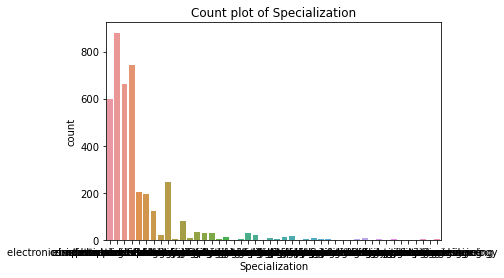


Frequency Distribution Table of Specialization:
                                             Frequency
electronics and communication engineering     0.220110
computer science & engineering                0.186093
information technology                        0.165083
computer engineering                          0.150075
computer application                          0.061031
mechanical engineering                        0.050275
electronics and electrical engineering        0.049025
electronics & telecommunications              0.030265
electrical engineering                        0.020510
electronics & instrumentation eng             0.008004
civil engineering                             0.007254
electronics and instrumentation engineering   0.006753
information science engineering               0.006753
instrumentation and control engineering       0.005003
electronics engineering                       0.004752
biotechnology                                 0.003752
other           

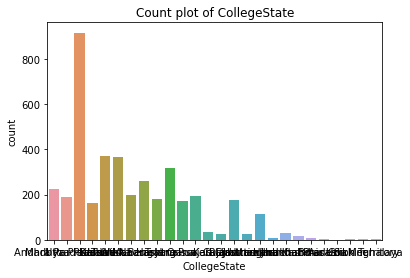


Frequency Distribution Table of CollegeState:
                   Frequency
Uttar Pradesh       0.228864
Karnataka           0.092546
Tamil Nadu          0.091796
Telangana           0.079790
Maharashtra         0.065533
Andhra Pradesh      0.056278
West Bengal         0.049025
Punjab              0.048274
Madhya Pradesh      0.047274
Haryana             0.045023
Rajasthan           0.043522
Orissa              0.043022
Delhi               0.040520
Uttarakhand         0.028264
Kerala              0.008254
Jharkhand           0.007004
Chhattisgarh        0.006753
Gujarat             0.006003
Himachal Pradesh    0.004002
Bihar               0.002501
Jammu and Kashmir   0.001751
Assam               0.001251
Union Territory     0.001251
Sikkim              0.000750
Meghalaya           0.000500
Goa                 0.000250


In [30]:
# Select only categorical columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()

# Loop through categorical columns
for col in categorical_cols:
    # Plot count plot
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f"Count plot of {col}")
    plt.show()
    
    # Print frequency distribution table
    freq_table = pd.DataFrame(df[col].value_counts(normalize=True))
    freq_table.columns = ["Frequency"]
    print(f"\nFrequency Distribution Table of {col}:")
    print(freq_table)

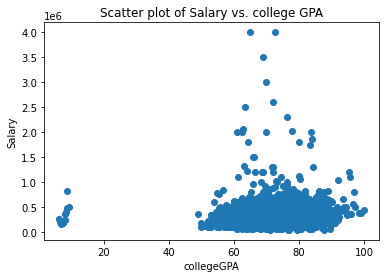

In [31]:
# Identify outliers using a scatter plot of Salary vs. GPA
plt.scatter(df['collegeGPA'], df['Salary'])
plt.title('Scatter plot of Salary vs. college GPA')
plt.xlabel('collegeGPA')
plt.ylabel('Salary')
plt.show()

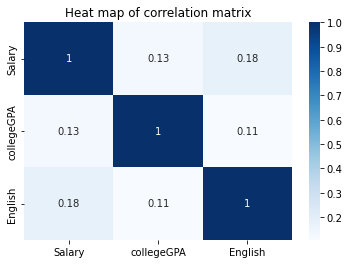

In [32]:
# Create a heat map of the correlation matrix
corr_matrix = df[['Salary', 'collegeGPA', 'English']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Heat map of correlation matrix')
plt.show()

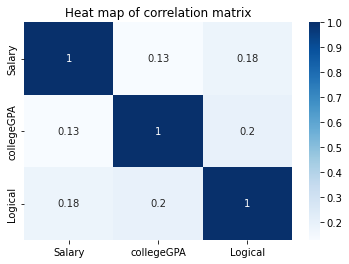

In [33]:
# Create a heat map of the correlation matrix
corr_matrix = df[['Salary', 'collegeGPA', 'Logical']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Heat map of correlation matrix')
plt.show()

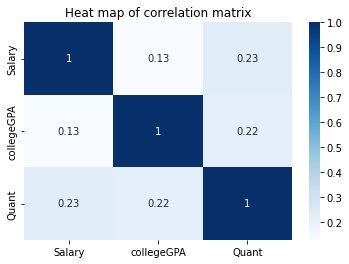

In [34]:
# Create a heat map of the correlation matrix
corr_matrix = df[['Salary', 'collegeGPA', 'Quant']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Heat map of correlation matrix')
plt.show()

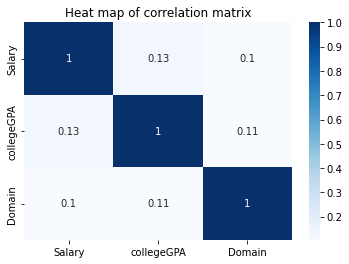

In [35]:
# Create a heat map of the correlation matrix
corr_matrix = df[['Salary', 'collegeGPA', 'Domain']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Heat map of correlation matrix')
plt.show()

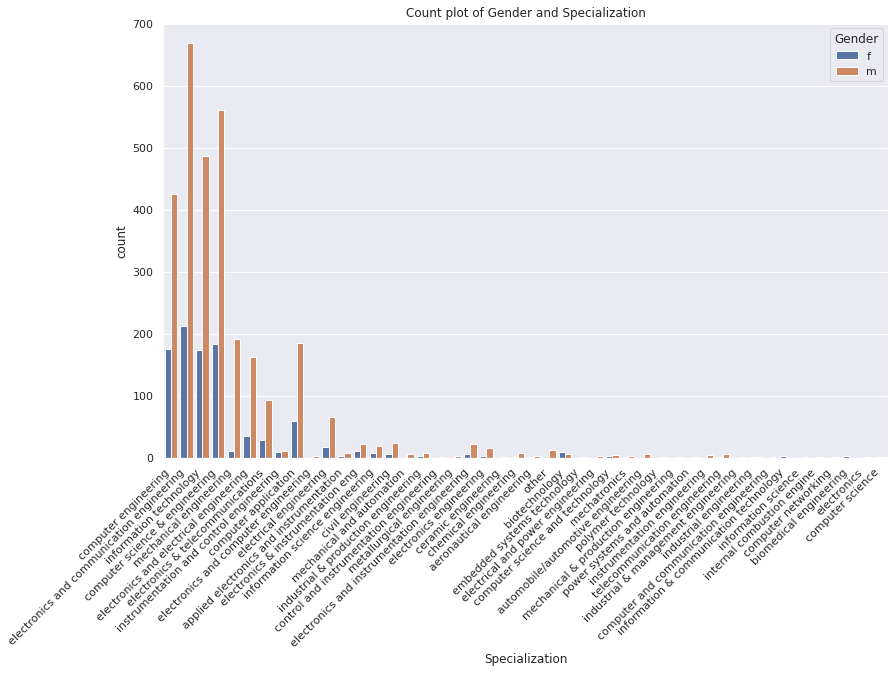

In [36]:
# Set the plot size and font scale
plt.figure(figsize=(13, 8))
sns.set(font_scale=1.0)

# Create a count plot of gender and specialization
ax = sns.countplot(x='Specialization', hue='Gender', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Count plot of Gender and Specialization')
plt.show()


In [37]:
# Standardize numerical columns
numerical_cols = ['Salary',  '10percentage', '12percentage', 'collegeGPA', 'English','Logical','Quant','Domain']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [38]:
# Convert categorical columns to binary or dummy variables
categorical_cols = ['Gender', 'Specialization', 'Designation','JobCity','CollegeState']
for col in categorical_cols:
    if len(df[col].unique()) > 2:
        # Use dummy variables for columns with more than 2 categories
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1, inplace=True)
    else:
        # Convert binary columns to 0/1
        df[col] = df[col].map({'Yes': 1, 'No': 0})

# Print the transformed dataset
print(df.head())

  Unnamed: 0      ID    Salary             DOJ             DOL  Gender  \
0      train  203097  0.527947  01/06/12 00:00         present     NaN   
1      train  579905  0.904045  01/09/13 00:00         present     NaN   
2      train  810601  0.081332  01/06/14 00:00         present     NaN   
3      train  267447  3.724775  01/07/11 00:00         present     NaN   
4      train  343523 -0.506320  01/03/14 00:00  01/03/15 00:00     NaN   

              DOB  10percentage                         10board  12graduation  \
0  19/02/90 00:00      0.647233  board ofsecondary education,ap          2007   
1  04/10/89 00:00      0.758921                            cbse          2007   
2  03/08/92 00:00      0.718307                            cbse          2010   
3  05/12/89 00:00      0.779227                            cbse          2007   
4  27/02/91 00:00      0.007570                            cbse          2008   

   ...  CollegeState_Orissa CollegeState_Punjab  CollegeState_Rajast